# EXERCÍCIO DE INTELIGÊNCIA ARTICIAL - REDES NEURAIS
## DUPLA: Cristhian Sala Minoves e Wiliian Silva de Almeida

1. Implementar uma rede neural para resolver o seguinte problema de classificação:

**a)** Usar, primeiramente, uma função de ativação degrau para os neurônios.

**b)** Depois, usar uma função sigmoidal. Para a função sigmoidal, computar a classe para saída que apresentar o maior valor.

![Conversao dos neurônios](imagem001.png)
                                       
**c)** Comparar a acurácia dos dois resultados.

#### O problema a ser resolvido:

Conjunto de dados biomédicos construídos pelo Dr. Henrique da Mota durante um período de residência médica no Grupo de Pesquisa Aplicada em Ortopedia (GARO) do Centro Médico-Cirúrgico de Reabilitação des Massues, Lyon, França.

Os dados foram organizados em duas tarefas de classificação diferentes, mas relacionadas. A primeira tarefa consiste em classificar os pacientes como pertencentes a uma das três categorias: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients).

Cada paciente é representado no conjunto de dados por seis atributos biomecânicos derivados da forma e orientação da pelve e da coluna lombar (nesta ordem):

1- incidência pélvica,

2- inclinação pélvica,

3- ângulo da lordose lombar,

4- inclinação sacral,

5- raio pélvico e

6- grau de espondilolistese.

https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

**Obs.:** como na base de dados as saídas estão com os nomes das doenças é necessário
transformar a saída em valores numéricos, ou seja:
![Conversao das doenças](imagem02.png)

## <center>Desenvolvimento: </center>

**Obs.:** o código das funções referenciadas abaixo se encontram no arquivo **"perceptrom.py"**

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
from perceptrom import* 


### Lendo os dados e embaralhando para treino, separando as amostras

In [19]:
rotulos=(('DH',[0,0,1]),('SL',[0,1,0]),('NO',[1,0,0]))
Entradas,w,b=ler_dados('column_3C.dat',3,rotulos)
Entradas

[(array([63.03, 22.55, 39.61, 40.48, 98.67, -0.25]), [0, 0, 1]),
 (array([ 39.06,  10.06,  25.02,  29.  , 114.41,   4.56]), [0, 0, 1]),
 (array([ 68.83,  22.22,  50.09,  46.61, 105.99,  -3.53]), [0, 0, 1]),
 (array([ 69.3 ,  24.65,  44.31,  44.64, 101.87,  11.21]), [0, 0, 1]),
 (array([ 49.71,   9.65,  28.32,  40.06, 108.17,   7.92]), [0, 0, 1]),
 (array([ 40.25,  13.92,  25.12,  26.33, 130.33,   2.23]), [0, 0, 1]),
 (array([ 53.43,  15.86,  37.17,  37.57, 120.57,   5.99]), [0, 0, 1]),
 (array([ 45.37,  10.76,  29.04,  34.61, 117.27, -10.68]), [0, 0, 1]),
 (array([ 43.79,  13.53,  42.69,  30.26, 125.  ,  13.29]), [0, 0, 1]),
 (array([36.69,  5.01, 41.95, 31.68, 84.24,  0.66]), [0, 0, 1]),
 (array([ 49.71,  13.04,  31.33,  36.67, 108.65,  -7.83]), [0, 0, 1]),
 (array([ 31.23,  17.72,  15.5 ,  13.52, 120.06,   0.5 ]), [0, 0, 1]),
 (array([ 48.92,  19.96,  40.26,  28.95, 119.32,   8.03]), [0, 0, 1]),
 (array([ 53.57,  20.46,  33.1 ,  33.11, 110.97,   7.04]), [0, 0, 1]),
 (array([ 57.3 ,  

In [20]:
#Embaralhar entrada
Entradas_treino,Entradas_teste=separar_amostra(Entradas,2,3,rotulos)
#print(len(Entradas_teste),len(Entradas_treino))

In [21]:
ErroD={}
ErroS={}
div=20
inicial=.05 #5% de aprendizagem de 5 em 5 até 50% de learning 
#Para gerar os graficos na proxima celula
ngraf=10
Inter=30

### Realizando o treino e guardando seus erros, tanto degrau quanto sigmoidal

In [22]:

for i in range(ngraf): 
  WD,BD,ErroDx=preceptron_treino(Entradas_treino,w.copy(),b.copy(),alfa=(i/div+inicial),max_int=Inter)
  WS,BS,ErroSx=preceptron_treino(Entradas_treino,w.copy(),b.copy(),alfa=(i/div+inicial),max_int=Inter,modo='sigmo')
  ErroD[i]=(ErroDx,WD,BD)
  ErroS[i]=(ErroSx,WS,BS)
'''
WD,BD,ErroD=preceptron_treino(Entradas_treino,w.copy(),b.copy(),max_int=30)

WS,BS,ErroS=preceptron_treino(Entradas_treino,w.copy(),b.copy(),max_int=30,modo='sigmo')
'''


"\nWD,BD,ErroD=preceptron_treino(Entradas_treino,w.copy(),b.copy(),max_int=30)\n\nWS,BS,ErroS=preceptron_treino(Entradas_treino,w.copy(),b.copy(),max_int=30,modo='sigmo')\n"

### Plotando os gráficos com os erros da função degrau

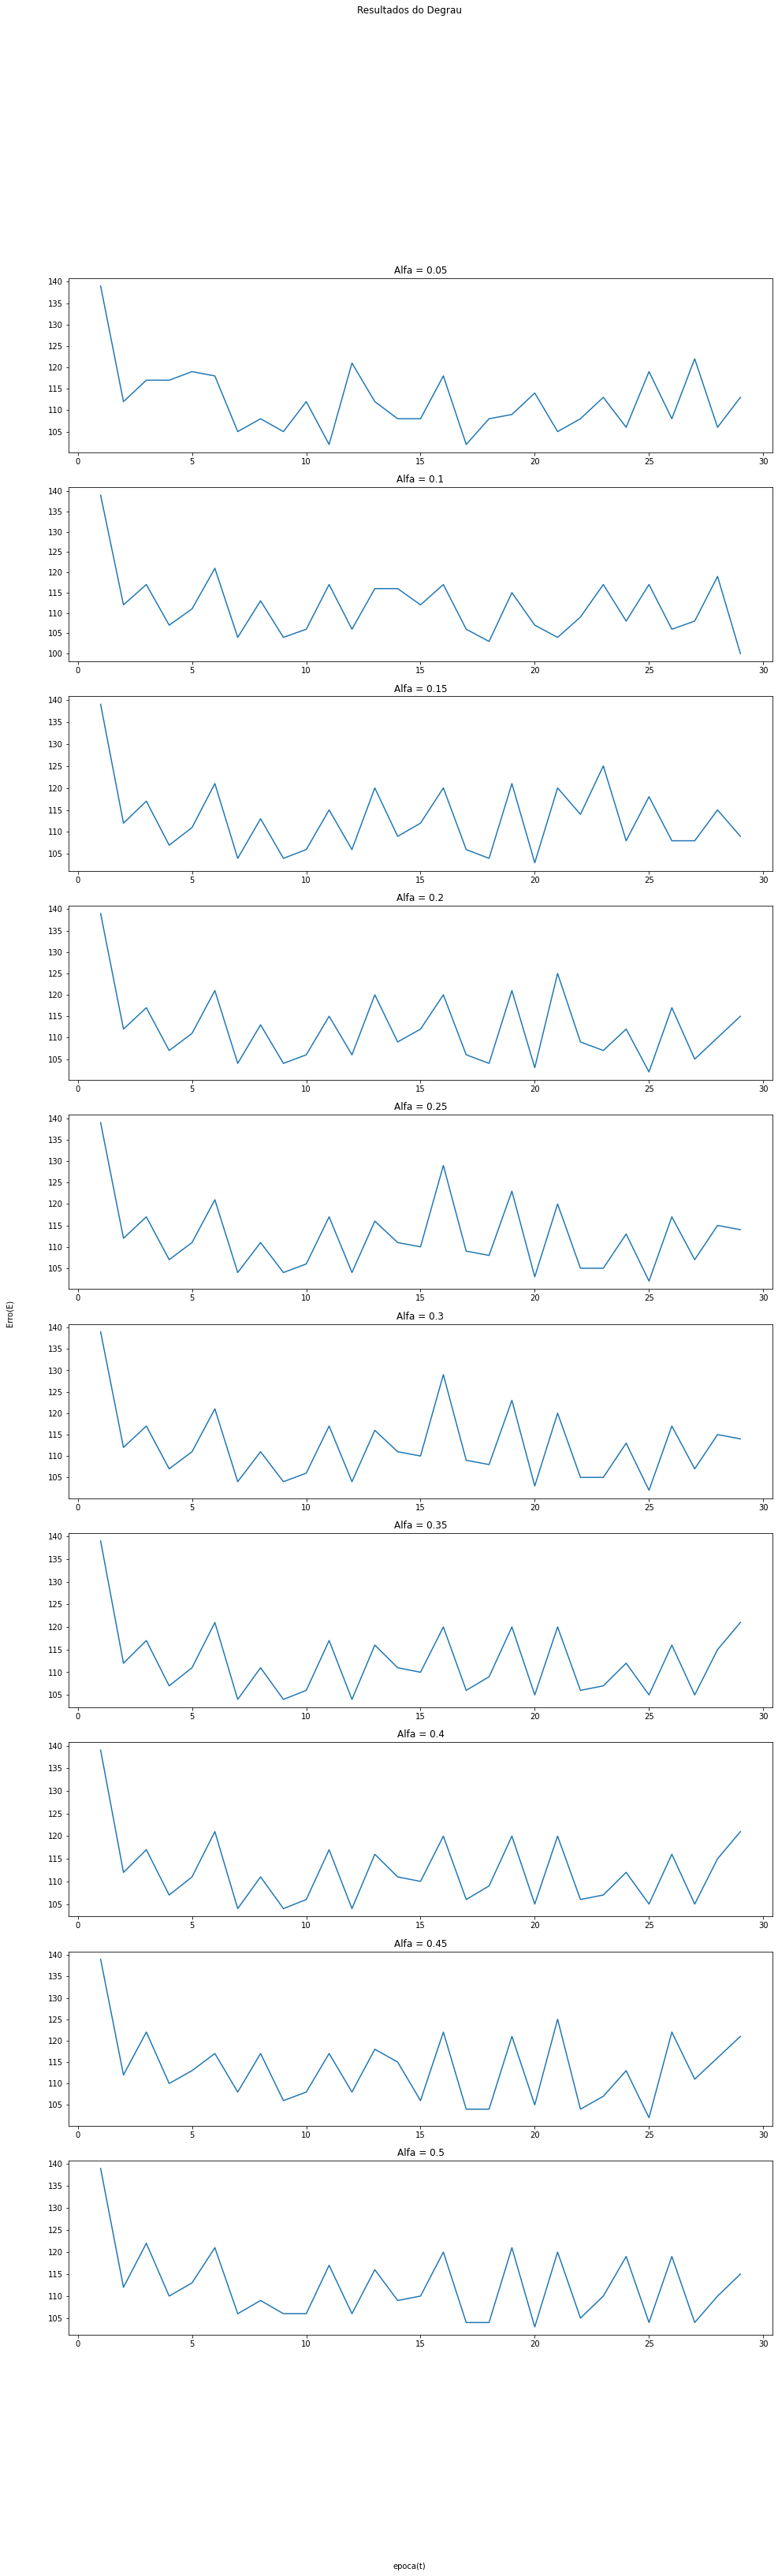

In [23]:
melhorED = float('inf')
melhorAlfaDi = 0
fig, axs = plt.subplots(ngraf)
fig.suptitle('Resultados do Degrau')
fig.set_figheight(48)
fig.set_figwidth(16)
fig.text(0.5, 0.04, 'epoca(t)', ha='center', va='center')
fig.text(0.06, 0.5, 'Erro(E)', ha='center', va='center', rotation='vertical')
for i in range(ngraf): 
  listaErroD=sorted(ErroD[i][0].items())
  Dx,Dy=zip(*listaErroD[:-1])
  axs[i].title.set_text(f'Alfa = {i/div+inicial:.2}')
  axs[i].plot(Dx, Dy)
  if(melhorED>ErroD[i][0][Inter-1]):
    melhorED = ErroD[i][0][Inter-1]
    melhorAlfaDi = i



### Plotando os gráficos com os erros da função Sigmoidal

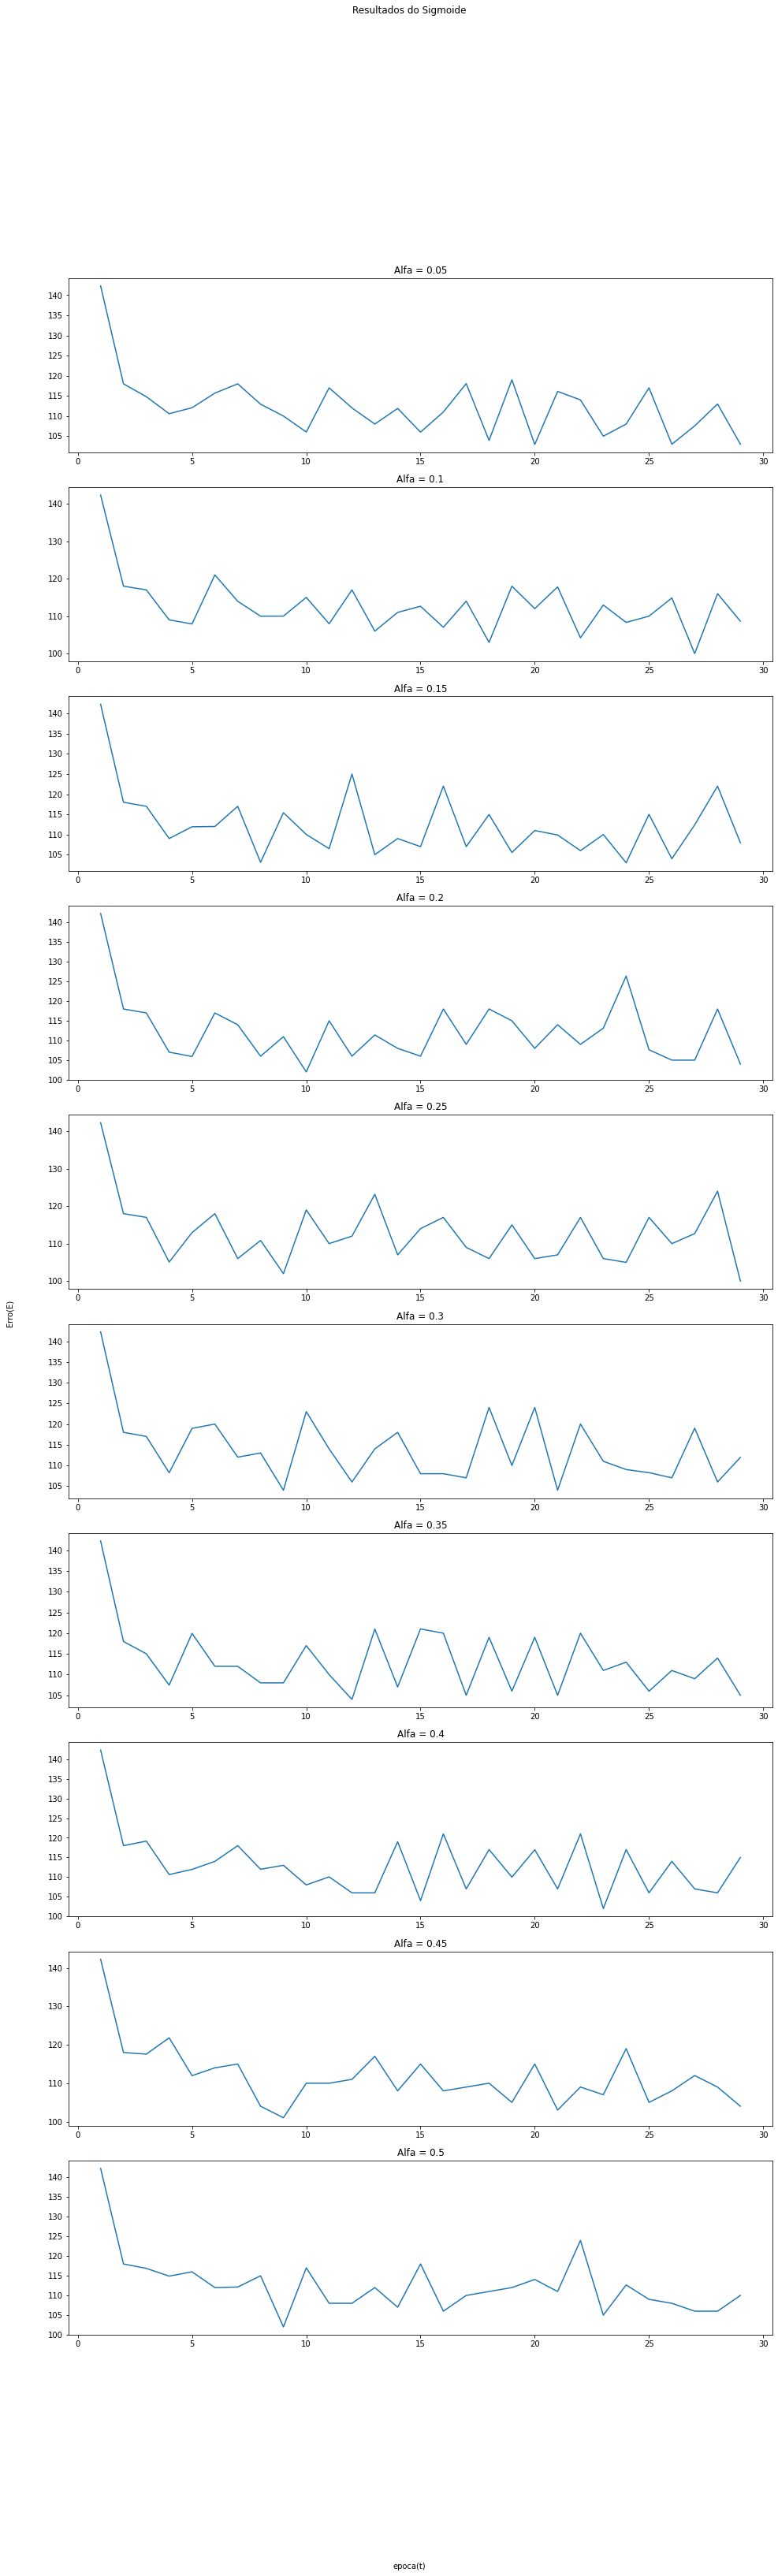

In [24]:
melhorES = float('inf')
melhorAlfaSi = 0
fig, axs = plt.subplots(ngraf)
fig.suptitle('Resultados do Sigmoide')
fig.set_figheight(48)
fig.set_figwidth(16)
fig.text(0.5, 0.04, 'epoca(t)', ha='center', va='center')
fig.text(0.06, 0.5, 'Erro(E)', ha='center', va='center', rotation='vertical')
for i in range(ngraf): 
  listaErroS=sorted(ErroS[i][0].items())
  Sx,Sy=zip(*listaErroS[:-1])
  axs[i].title.set_text(f'Alfa = {i/div+inicial:.2}')
  axs[i].plot(Sx, Sy)
  if(melhorES>ErroS[i][0][Inter-1]):
    melhorES = ErroS[i][0][Inter-1]
    melhorAlfaSi = i



In [25]:
print("Maior acurácia da função degrau: ")
print(preceptron_teste(ErroD[melhorAlfaDi][1],ErroD[melhorAlfaDi][2],Entradas_teste))
print("Maior acurácia da função Sigmoidal: ")
print(preceptron_teste(ErroS[melhorAlfaSi][1],ErroS[melhorAlfaSi][2],Entradas_teste,modo = "sigmo"))
#print(w)

Maior acurácia da função degrau: 
(68.0, 'Acuracia=0.6213592233009708')
Maior acurácia da função Sigmoidal: 
(66.0, 'Acuracia=0.6796116504854369')


## <center>Conclusão</center>

Ambas as funções tiveram um resultado mediano, com uma diferença de acurácia pequena, favorecendo a função sigmoidal, que ficou com quase 68%, contra a função degrau com aproximadamente 62%. Além disso, foi executado o algoritmo algumas vezes, fazendo a acurácia oscilar bastante, mas nunca acima de 80%. 

Com isso, é possível ver que nenhuma das duas funções é ideal para esse tipo de cenário do problema, mas que a sigmoidal é ligeiramente melhor.